<img src="../../resources/cropped-SummerWorkshop_Header.png">  

<h1 align="center">Dimensionality Reduction SWDB 2019 </h1> 
<h3 align="center">Tuesday, August 27, 2019</h3> 

In [1]:
import os
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

In [3]:
from sklearn.decomposition import PCA

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<p>In this tutorial we look at Unsupervised Learning.  In contrast to supervised learning, unsupervised learning operates on a set of data points $\vec{x}_i$.  Instead of trying to construct a function that maps that data onto another set of given points, we seek to find a transformation that discovers structure in the data.  
</p>
<p>
A simple and important form of unsupervised learning is called Principal Components Analysis, or PCA.  Assume the data $\vec{x}_i$ exists in $N$ dimensions.  Given an integer $n < N$, PCA attemps to find a linear subspace of dimension $n$ that minimizes the variance of the data outside of that subspace.  Put another way, PCA defines a subspace of dimension $n < N$ such that, when the data is approximated by projecting onto that subspace, the reconstruction error is minimized.  
</p>
<p>
Let us denote the subspace with the orthogonal matrix ${\bf W}$, of dimensions $(n, N)$.  The data can be represented with the matrix ${\bf X}$, of dimensions $(T, N)$, where $T$ is the number of samples.  Let the coordinates of the data in the subspace be labelled ${\bf Z}$, which is of dimensions $(T, n)$.  The cost function for PCA is then
</p>
<p>
$E = \frac{1}{2}  \left | {\bf X} - {\bf Z} \cdot {\bf W} \right |^2$
</p>
<p>
Note that we have to optimize over *both* ${\bf Z}$ and ${\bf W}$, subject to the constraint that ${\bf W}$ is orthogonal.
</p>
<p>
We can equivalently define PCA by specifying the principal components as the eigenvectors of the covariance matrix with the $n$ largest eigenvalues.  Intuitively one can see that this choice will produce the smallest amount of variability away from the subspace, and thus solve the problem as we originally defined it.  This allows us to compute the PCAs very simply with diagonalization or SVD.
</p>
<p>
    There are many other unsupervised learning methods.  They are helpful when trying to either reduce the complexity of the dataset in order to facilitate another computation (such as regression or classification) or for exploratory data analysis in which one is trying to discover structure that may be obscured by noise.
 </p>
</div>

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<p>
As before, we will use `sckit-learn` to perform `Principal Components Analysis`, first on some toy data, and then on some data from the Behavior recordings.  The interface will be the same for other algorithms in `scikit-learn`.
</p>
</div>

Let's start with some toy data

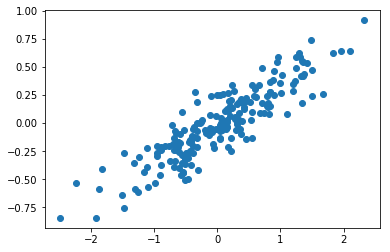

In [25]:
# generate some random 2 dimensional data
# Note that this dataset has a mean of 0 in both dimensions. This will be important later. 

np.random.seed(1)
X = np.dot(np.random.random(size=(2, 2)), np.random.normal(size=(2, 200))).T

#plot random data
plt.plot(X[:, 0], X[:, 1], 'o')


In [5]:
X.shape

(200, 2)

In [26]:
# Construct Covariance Matrix
A = (1.0/X.shape[0])*np.dot(X.T, X)

In [27]:
A

array([[0.67988975, 0.22964332],
       [0.22964332, 0.09835428]])

In [28]:
# Compute Eigenvalue decomposition of covariance matrix
evalues, evectors = np.linalg.eig(A)

In [29]:
evalues

array([0.75963778, 0.01860626])

In [30]:
evectors

array([[ 0.94465994, -0.3280512 ],
       [ 0.3280512 ,  0.94465994]])

(-3, 3)

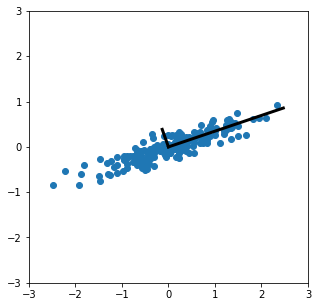

In [32]:
fig, ax = plt.subplots(figsize=(5,5))

ax.plot(X[:, 0], X[:, 1], 'o')
for a,v in zip(evalues, evectors.T):
    ax.plot([0, 3.*np.sqrt(a)*v[0]], [0, 3.*np.sqrt(a)*v[1]], '-k', lw=3)

ax.set_ylim(-3,3)
ax.set_xlim(-3,3)

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<p>
PCA is an orthogonal coordinate system transformation that prioritizes maximum variance.

Project the values onto the first principal component

In [33]:
X_proj_1 = np.dot(X, evectors.T[0])
X_proj_2 = np.dot(X, evectors.T[1])

Text(0, 0.5, 'Second principal component')

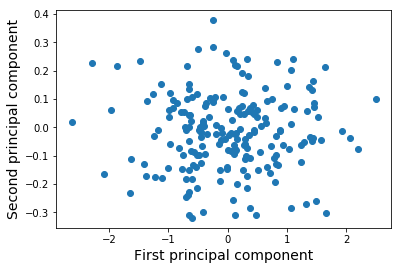

In [34]:
plt.plot(X_proj_1, X_proj_2, 'o')
plt.xlabel("First principal component", fontsize=14)
plt.ylabel("Second principal component", fontsize=14)
# plt.axis('equal')

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<p>

### Now let's use sklearn.

In [35]:
from sklearn.decomposition import PCA

In [36]:
pca = PCA(n_components=2)
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [37]:
pca.explained_variance_

array([0.7625315, 0.0184779])

In [38]:
pca.explained_variance_ratio_

array([0.97634101, 0.02365899])

In [39]:
pca.components_

array([[-0.94446029, -0.32862557],
       [-0.32862557,  0.94446029]])

These components are the same as the eigenvectors we computed above:

In [40]:
evectors

array([[ 0.94465994, -0.3280512 ],
       [ 0.3280512 ,  0.94465994]])

(-3, 3)

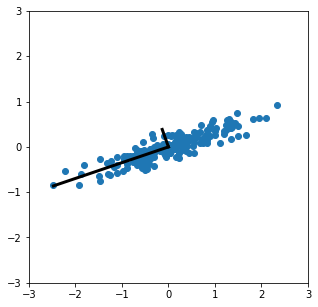

In [41]:
fig, ax = plt.subplots(figsize=(5,5))

ax.plot(X[:, 0], X[:, 1], 'o')
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    ax.plot([0, v[0]], [0, v[1]], '-k', lw=3)

ax.set_ylim(-3,3)
ax.set_xlim(-3,3)

### Now let's look at the data projected onto the transforms

In [21]:
X_project = pca.fit_transform(X)

In [22]:
X_project = pca.transform(X)

Text(0, 0.5, 'Second principal component')

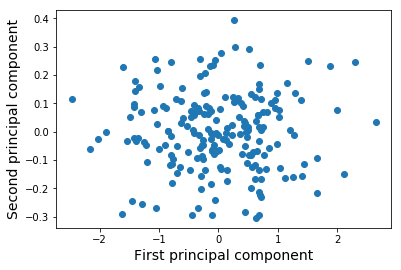

In [23]:
plt.plot(X_project[:,0], X_project[:,1], 'o')
plt.xlabel("First principal component", fontsize=14)
plt.ylabel("Second principal component", fontsize=14)
# plt.axis('equal')

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<p>

## Let's try this with some real data from the Visual Behavior dataset.

In [42]:
#make sure your drive path is correct! 
# macOS/OS X
# drive_path = '/Volumes/Brain2018/visual_behavior/'

# Windows (a good guess)
# drive_path = 'e:/visual_behavior'

# Linux (will vary; the following is possibly what Ubuntu will do)
# drive_path = '/media/Brain2018/visual_behavior'

# AWS
drive_path = r'/'

In [44]:
manifest_file = '/allen/programs/braintv/workgroups/nc-ophys/visual_behavior/SWDB_2019/visual_behavior_data_manifest.csv'
manifest=pd.read_csv(manifest_file, index_col=0)
manifest = manifest.reset_index(drop=True)

In [45]:
manifest.head()

,container_id,container_workflow_state,donor_id,full_genotype,sex,created_at,behavior_session_id,equipment_name,ophys_session_name,ophys_experiment_id,ophys_workflow_state,imaging_depth,targeted_structure,stage_name,retake_number
0,782536745,postprocessing,722884873,Slc17a7-IRES2-Cre/wt;Camk2a-tTA/wt;Ai93(TITL-G...,F,2018-11-08 20:45:52.011892,775378326,CAM2P.5,20181108_403491_1imagesA,775614751,passed,375,VISp,OPHYS_1_images_A,0.0
1,782536745,postprocessing,722884873,Slc17a7-IRES2-Cre/wt;Camk2a-tTA/wt;Ai93(TITL-G...,F,2018-11-13 19:45:53.130447,778166125,CAM2P.5,20181113_403491_2imagesA,778644591,passed,375,VISp,OPHYS_2_images_A_passive,0.0
2,782536745,postprocessing,722884873,Slc17a7-IRES2-Cre/wt;Camk2a-tTA/wt;Ai93(TITL-G...,F,2018-12-10 18:40:53.679184,792499741,CAM2P.5,20181210_403491_4imagesB,792812544,passed,375,VISp,OPHYS_4_images_B,2.0
3,782536745,postprocessing,722884873,Slc17a7-IRES2-Cre/wt;Camk2a-tTA/wt;Ai93(TITL-G...,F,2018-12-15 19:10:57.996849,796032489,CAM2P.5,20181215_403491_5imagesB,796106850,passed,375,VISp,OPHYS_5_images_B_passive,2.0
4,782536745,postprocessing,722884873,Slc17a7-IRES2-Cre/wt;Camk2a-tTA/wt;Ai93(TITL-G...,F,2018-11-29 18:55:48.200392,788017709,CAM2P.5,20181129_403491_6imagesB,788490510,passed,375,VISp,OPHYS_6_images_B,0.0


In [50]:
# Import the AllenSDK interface
from allensdk.brain_observatory.behavior.behavior_ophys_api.behavior_ophys_nwb_api import BehaviorOphysNwbApi as NwbApi
from allensdk.internal.api.behavior_ophys_api import BehaviorOphysLimsApi
from allensdk.brain_observatory.behavior import behavior_ophys_session as bos

In [51]:
# NEED TO UPDATE ONCE DATA IS UPLOADED TO AWS
def get_nwb_filepath(experiment_id):
    base_dir = '/allen/programs/braintv/workgroups/nc-ophys/visual_behavior/SWDB_2019/nwb_files/'
    return os.path.join(base_dir, 'behavior_ophys_session_{}.nwb'.format(experiment_id))

experiment_id = 792812544
get_nwb_filepath(experiment_id)
#load data from the corresponding NWB file, retrieve session object
#api = BehaviorOphysLimsApi(experiment_id)
filepath = get_nwb_filepath(experiment_id)
nwb_exp = NwbApi(filepath)

session = bos.BehaviorOphysSession(nwb_exp)

In [ ]:

session = cache.get_session(experiment_id)


In [78]:
# import visual behavior dataset class from the visual_behavior package
from visual_behavior.ophys.dataset.visual_behavior_ophys_dataset import VisualBehaviorOphysDataset
from visual_behavior.ophys.response_analysis.response_analysis import ResponseAnalysis 

In [79]:
experiment_id = 716337289

In [80]:
dataset= VisualBehaviorOphysDataset(experiment_id, cache_dir=drive_path)
analysis = ResponseAnalysis(dataset)
trial_response_df = analysis.get_trial_response_df()

loading trial response dataframe
loading flash response dataframe
loading trial response dataframe


In [81]:
trial_response_df.head()

,trial,cell,cell_specimen_id,trace,timestamps,mean_response,baseline_response,p_value,sd_over_baseline,running_speed_trace,...,behavioral_response_latency,rewarded,reward_times,reward_volume,reward_rate,start_time,end_time,trial_length,mouse_id,start_date_time
0,0,0,716381561,"[0.0454833687078, 0.000236799725301, 0.0632461...","[242.37208, 242.40438, 242.43667, 242.46897, 2...",0.018197,0.032951,0.488493,0.286458,"[27.9601107765, 28.1828341376, 28.3216493407, ...",...,0.41699,True,[246.79134],0.007,2.578538,243.35525,251.61192,8.256983,M384942,2018-06-29 14:48:27.249000-07:00
1,0,1,716381565,"[0.0979568465676, -0.0433544193646, 0.07921420...","[242.37208, 242.40438, 242.43667, 242.46897, 2...",-0.002507,0.015504,0.168091,-0.069637,"[27.9601107765, 28.1828341376, 28.3216493407, ...",...,0.41699,True,[246.79134],0.007,2.578538,243.35525,251.61192,8.256983,M384942,2018-06-29 14:48:27.249000-07:00
2,0,2,716381567,"[0.0999287912418, -0.00476247723306, -0.011382...","[242.37208, 242.40438, 242.43667, 242.46897, 2...",0.003900,0.020132,0.279329,0.079650,"[27.9601107765, 28.1828341376, 28.3216493407, ...",...,0.41699,True,[246.79134],0.007,2.578538,243.35525,251.61192,8.256983,M384942,2018-06-29 14:48:27.249000-07:00
3,0,3,716381569,"[0.0655943992386, 0.0200021434153, -0.04071441...","[242.37208, 242.40438, 242.43667, 242.46897, 2...",-0.011228,-0.036653,0.153940,-0.240420,"[27.9601107765, 28.1828341376, 28.3216493407, ...",...,0.41699,True,[246.79134],0.007,2.578538,243.35525,251.61192,8.256983,M384942,2018-06-29 14:48:27.249000-07:00
4,0,4,716381571,"[-0.0343720772858, 0.0181534799909, -0.0043600...","[242.37208, 242.40438, 242.43667, 242.46897, 2...",0.062532,-0.003773,0.003509,1.898987,"[27.9601107765, 28.1828341376, 28.3216493407, ...",...,0.41699,True,[246.79134],0.007,2.578538,243.35525,251.61192,8.256983,M384942,2018-06-29 14:48:27.249000-07:00


<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<p>

A key step in using PCA is the getting data into the right shape. We want to create an array of the population's responses to each trial, with dimensions of trials X cells.  The trial_response dataframe has a row for each cell for each trial, so there's going to be a little repackaging of the data to do before we can throw this into sklearn.

In [82]:
num_trials = len(trial_response_df.trial.unique())
print num_trials

209


In [83]:
num_cells = len(trial_response_df.cell.unique())
print num_cells

125


In [84]:
response_array = np.empty((num_trials,num_cells))
for i in range(num_trials):
    response_array[i,:] = trial_response_df[trial_response_df.trial==i].mean_response.values

In [92]:
response_array.shape

(209, 125)

Text(0,0.5,'Trials')

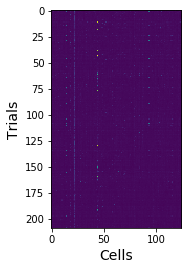

In [114]:
plt.imshow(response_array)
plt.xlabel("Cells", fontsize=14)
plt.ylabel("Trials", fontsize=14)

Before running PCA, we must zero-mean the data

In [126]:
response_array -= response_array.mean()

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<p>
## How many components do we need?
Let's start getting a lot and then see which was are most informative

In [94]:
pca = PCA(n_components=20)

In [127]:
pca.fit(response_array)

PCA(copy=True, iterated_power='auto', n_components=20, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [128]:
pca.components_.shape

(20, 125)

Text(0,0.5,'Explained variance ratio')

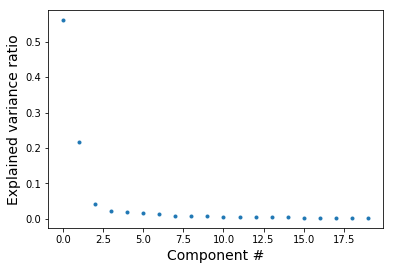

In [129]:
plt.plot(pca.explained_variance_ratio_, '.')
plt.xlabel("Component #", fontsize=14)
plt.ylabel("Explained variance ratio", fontsize=14)

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<p>
Let's visualize these data projected onto the first two components

In [130]:
response_reduced = pca.fit_transform(response_array)

In [131]:
response_reduced.shape

(209, 20)

Text(0,0.5,'Second principal component')

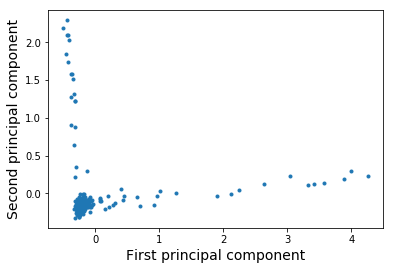

In [132]:
plt.plot(response_reduced[:,0], response_reduced[:,1], '.')
plt.xlabel("First principal component", fontsize=14)
plt.ylabel("Second principal component", fontsize=14)

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<p>
### What are the two components that explain most of the variance?

Text(0.5,0,'Cell #')

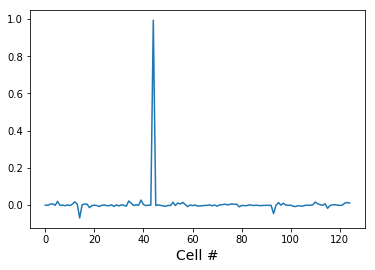

In [133]:
plt.plot(pca.components_[0])
plt.xlabel("Cell #", fontsize=14)

Text(0.5,0,'Cell #')

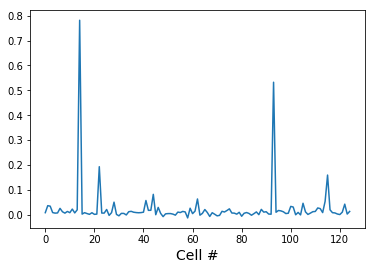

In [134]:
plt.plot(pca.components_[1])
plt.xlabel("Cell #", fontsize=14)

This suggests that there are a small number of cells that are more informative than the rest.

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<p>
What do these two "wings" correspond to? Plot the projected data, and label each trial according to the image that was presented.

Text(0,0.5,'Second principal component')

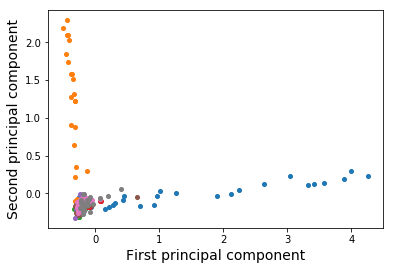

In [135]:
images = trial_response_df.change_image_name.unique()
for a in images:
    inds = trial_response_df[trial_response_df.change_image_name==a].trial.unique()
    plt.plot(response_reduced[inds,0], response_reduced[inds,1], '.', markersize=8)
plt.xlabel("First principal component", fontsize=14)
plt.ylabel("Second principal component", fontsize=14)